# <center style='color:dodgerblue'>`ExtraTreesClassifier` using Scikit-Learn</center>

# 1. Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import plot_tree
from sklearn import metrics

# 2. Load `Ionosphere` dataset

In [2]:
df = pd.read_csv('Ionosphere.csv')
df.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [3]:
df.shape

(351, 35)

In [4]:
df.Class.unique()

array(['g', 'b'], dtype=object)

In [5]:
df.Class.value_counts()

g    225
b    126
Name: Class, dtype: int64

# 3. Perform preprocessing

In [6]:
df.Class = df.Class.apply(lambda x: 0 if x == 'b' else 1)
df.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


In [7]:
df.Class.unique()

array([1, 0])

In [8]:
df.Class.value_counts()

1    225
0    126
Name: Class, dtype: int64

# 4. Separate features and classes

In [9]:
X = df.drop(['Attribute2', 'Class'], axis=1)
y = df.iloc[:, -1]

# 5. Split the dataset

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75, random_state=42)

In [11]:
len(X_train), len(X_test), len(y_train), len(y_test)

(263, 88, 263, 88)

# 6. Apply `ExtraTreesClassifier`

In [12]:
etc = ExtraTreesClassifier(n_estimators=10, max_depth=5, random_state=42)
etc.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=5, n_estimators=10, random_state=42)

In [13]:
print('Accuracy on the train set:', round(etc.score(X_train, y_train), 4))
print('Accuracy on the test set:', round(etc.score(X_test, y_test), 4))

Accuracy on the train set: 0.9354
Accuracy on the test set: 0.9318


# 7. Plot `confusion_matrix`

In [14]:
y_pred = etc.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=etc.classes_)

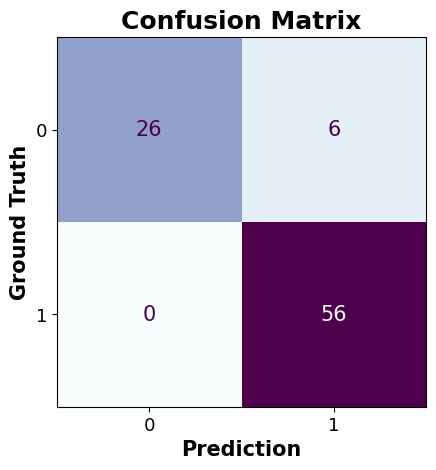

In [15]:
disp.plot(cmap='BuPu', colorbar=False, text_kw={'size': 15})

plt.xlabel('Prediction', fontsize=15, fontweight='bold')
plt.ylabel('Ground Truth', fontsize=15, fontweight='bold')
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

In [16]:
y_test.value_counts()

1    56
0    32
Name: Class, dtype: int64

In [17]:
cat_labels = ['b', 'g']
y_pred = etc.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=cat_labels)

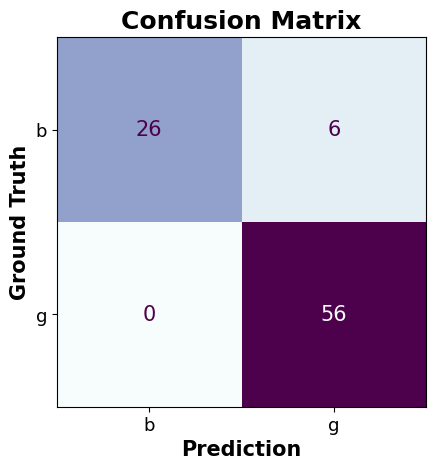

In [18]:
disp.plot(cmap='BuPu', colorbar=False, text_kw={'size': 15})

plt.xlabel('Prediction', fontsize=15, fontweight='bold')
plt.ylabel('Ground Truth', fontsize=15, fontweight='bold')
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

In [19]:
print('F1 score:', round(metrics.f1_score(y_test, y_pred), 4))
print('Jaccard score:', round(metrics.jaccard_score(y_test, y_pred), 4))

F1 score: 0.9492
Jaccard score: 0.9032


# 8. Print `classification_report`

In [20]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        32
           1       0.90      1.00      0.95        56

    accuracy                           0.93        88
   macro avg       0.95      0.91      0.92        88
weighted avg       0.94      0.93      0.93        88



# 9. Plot a tree

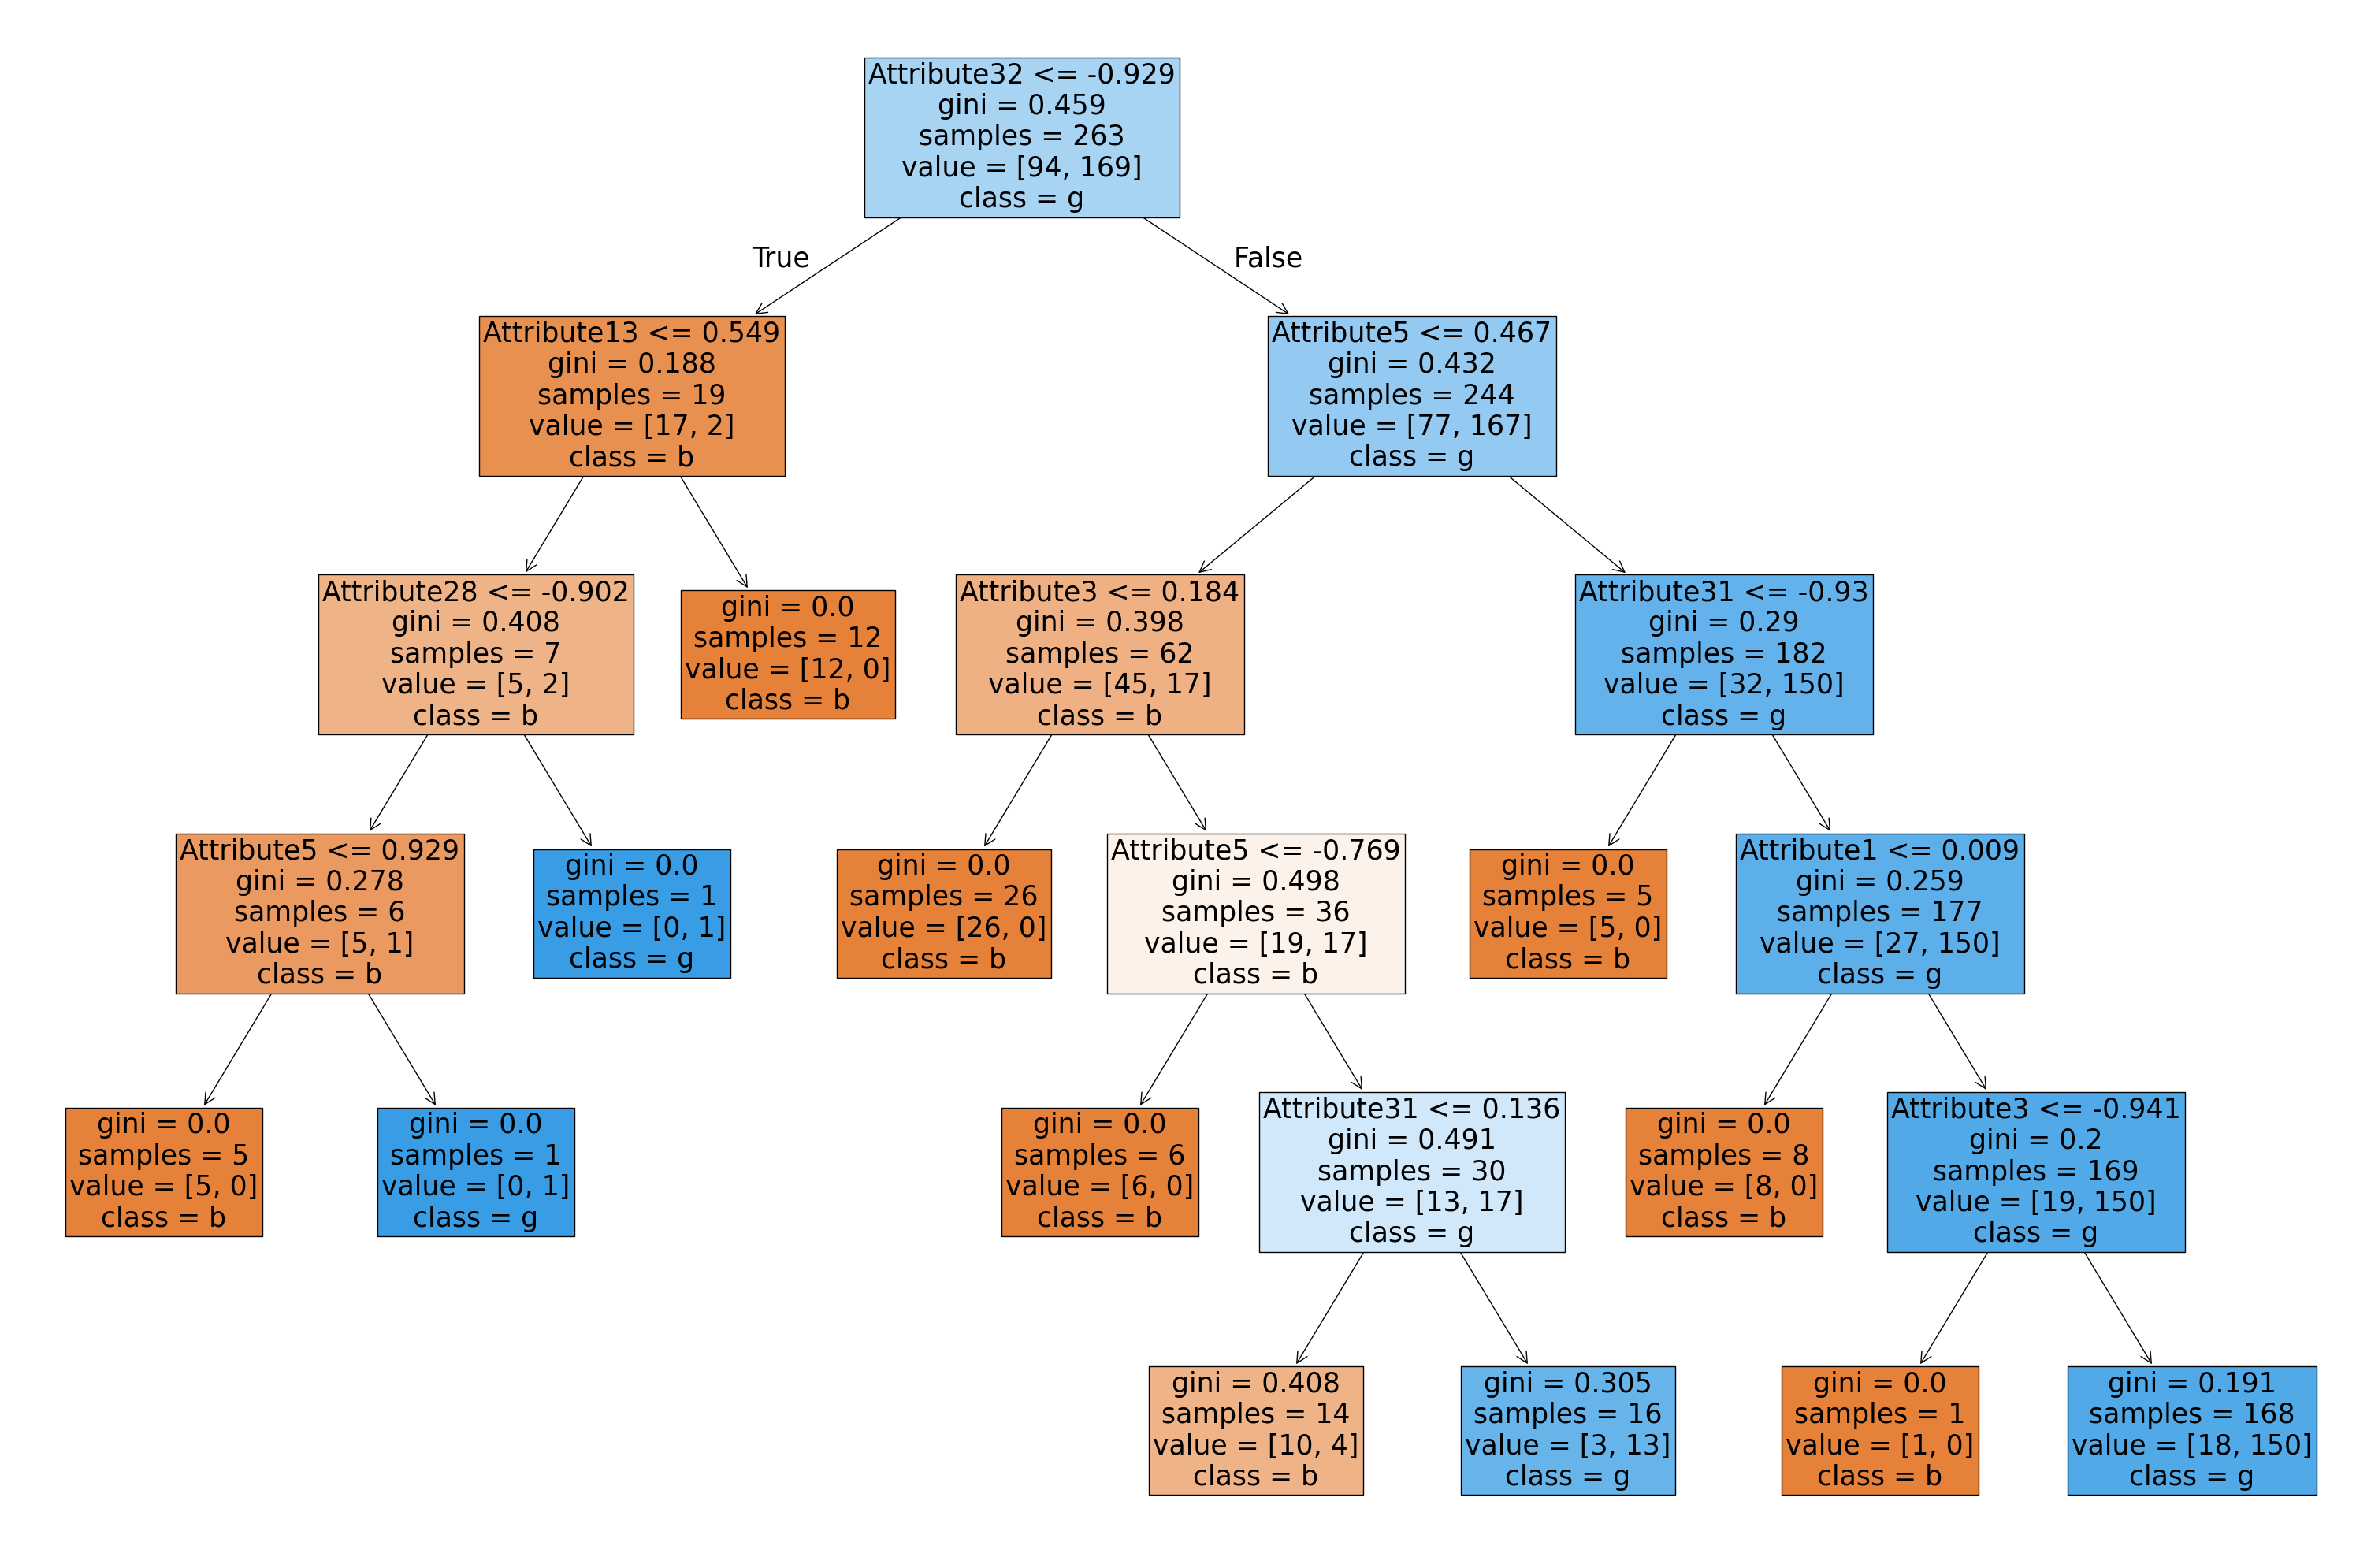

In [21]:
plt.figure(figsize=(30, 20))
plot_tree(etc.estimators_[9], fontsize=25, filled=True, feature_names=X.columns, class_names=['b', 'g'])
plt.tight_layout();

In [22]:
y_train.value_counts()

1    169
0     94
Name: Class, dtype: int64

# 10. Feature importance

In [23]:
fi = pd.DataFrame(etc.feature_importances_, index=etc.feature_names_in_, columns=['Importance'])
fi

,Importance
Attribute1,0.187013
Attribute3,0.050468
Attribute4,0.014473
Attribute5,0.064349
Attribute6,0.103621
Attribute7,0.085084
Attribute8,0.029933
Attribute9,0.004814
Attribute10,0.000000
Attribute11,0.009971


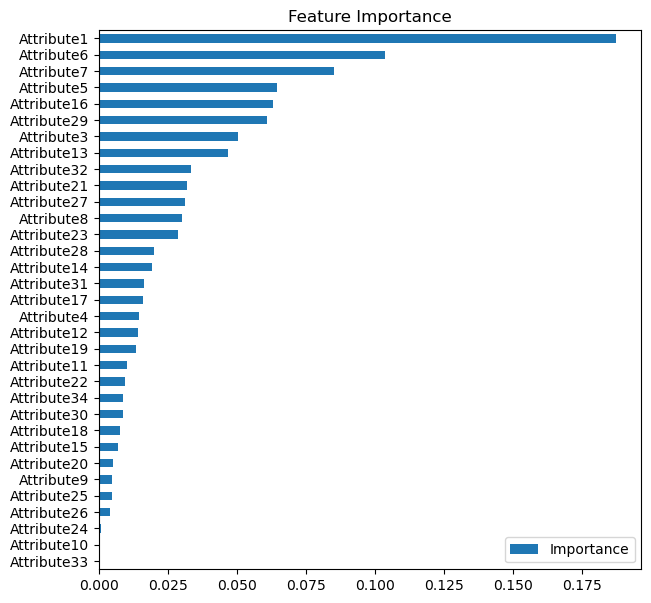

In [24]:
fi.sort_values('Importance').plot(kind='barh', figsize=(7, 7), title='Feature Importance').legend(loc=4);